<h1 align="center">MouseNet</h1> 
<h2 align="center">A biologically constrained convolutional neural network model for mouse visual cortex</h2> 
<h3 align="center">Wendesday, June 16, 2021</h3> 

<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #F0FAFF; ">

<p>This notebook will introduce you to MouseNet, a convolutional neural network constructed based on data from interareal tracing experiments, neuron number estimates, and layerwise connection statistics
    
<p>The code for this network, along with examples and training scripts, can be found at:  <a>https://github.com/mabuice/Mouse_CNN</a>

<p>This notebook will describe how to instantiate and reconstruct the architecture, as well as how to train and instantiate MouseNet itself.  MouseNet's use will be demonstrated by computed a set of orientation tuning curves in VISp4 (Layer 4 of V1).
</div>

<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #F0FAFF; ">
    
<p>MouseNet is described in "CNN MouseNet:  A biologically constrained convolutionalneural network model for mouse visual cortex" (submitted)
<p> Jianghong Shi, Bryan Tripp, Eric Shea-Brown, Stefan Mihalas, Michael Buice

<p>Convolutional neural networks trained on object recognition derive inspiration from theneural architecture of the visual system in primates, and have been used as models ofthe feedforward computation performed in the primate ventral stream.  In contrast tothe deep hierarchical organization of primates, the visual system of the mouse has ashallower arrangement.  Since mice and primates are both capable of visually guidedbehavior, this raises questions about the role of architecture in neural computation.  Inthis work, we introduce a novel framework for building a biologically constrainedconvolutional neural network model of the mouse visual cortex.  The architecture andstructural parameters of the network are derived from experimental measurements,specifically the 100-micrometer resolution interareal connectome, the estimates ofnumbers of neurons in each area and cortical layer, and the statistics of connectionsbetween cortical layers.  This network is constructed to support detailed task-optimizedmodels of mouse visual cortex, with neural populations that can be compared to specificcorresponding populations in the mouse brain.  Using a well-studied image classificationtask as our working example, we demonstrate the computational capability of thismouse-sized network.  Given its relatively small size, MouseNet achieves roughly 2/3rdsthe performance level on ImageNet as VGG16.  In combination with the large scaleAllen Brain Observatory Visual Coding dataset, we use representational similarityanalysis to quantify the extent to which MouseNet recapitulates the neuralrepresentation in mouse visual cortex.  Importantly, we provide evidence that optimizingfor task performance does not improve similarity to the corresponding biological systembeyond a certain point.  We demonstrate that the distributions of some physiologicalquantities are closer to the observed distributions in the mouse brain after task training.We encourage the use of the MouseNet architecture by making the code freely available.
</div>

<img src="framework2-cropped.jpg"> 

In [13]:
import os
import sys
sys.path.append('../')
sys.path.append('../cmouse/')
sys.path.append('../mouse_cnn/')
%matplotlib inline

import torch

In [1]:
# Pick a directory for auxiliary data and files needed for the connectivity
DATA_DIR = '../data' 

<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #F0FAFF; ">
   
<p>In addition to requiring many standard scientific computing packages for python (numpy, scipy, sci-kit learn, etc.), MouseNet requires the following two packages:
    
    
<p>AllenSDK:  <a>https://github.com/AllenInstitute/AllenSDK</a>
    
<p>mouse_connectivity_models:  <a>https://github.com/AllenInstitute/mouse_connectivity_models</a>
    

Building the architecture from scratch requires a couple of GBs of data that will be downloaded by `mouse_connectivity_models` and placed in `DATA_DIR`.  If you only want the prebuilt network, there is a method below to load that network without first downloading this data.
    
</div>

<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #F0FAFF; ">
    
The network architecture is constructed using the `Architecture` and class and `gen_anatomy` functions.  These create the network object that reproduces the regional connectivity from the mesoscopic tracing data.
    
</div>

<img src="network.jpg"> 

In [2]:
from anatomy import gen_anatomy
from architecture import Architecture

In [3]:
architecture = Architecture(data_folder=DATA_DIR)
anet = gen_anatomy(architecture)

<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #F0FAFF; ">

The `anet` object contains a convenience method to visualize the graph.
    
</div>

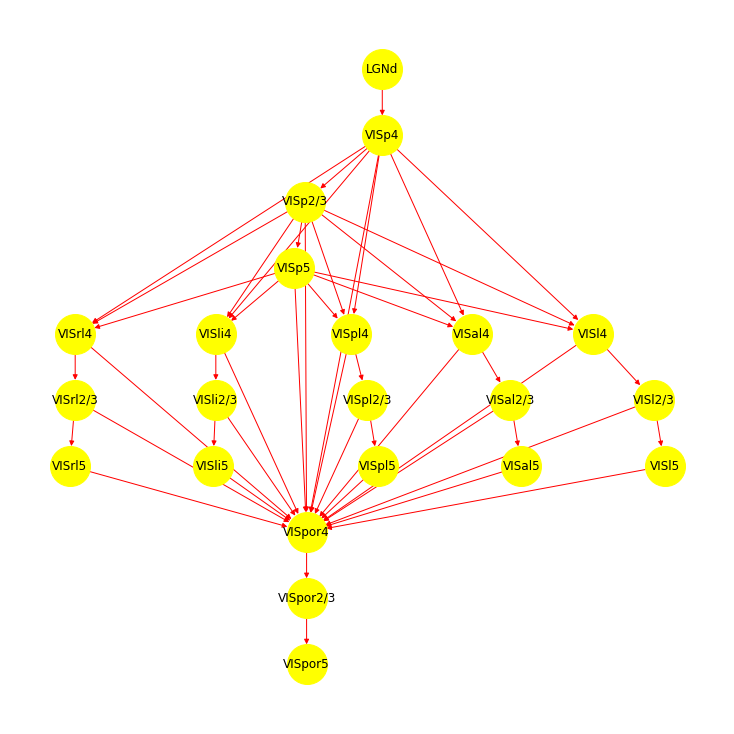

In [4]:
anet.draw_graph()

<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #F0FAFF; ">

The `network` class creates the network architecture, including the kernel parameters for the CNN, using hit-rate data and neuron count estimates in each area.  The `construct_from_anatomy` method produces the final network object that will be used to instantiate the model.

NB:  The step might take a few minutes.
    
</div>

<img src="construct-larger-font.jpg">

In [5]:
import network
net = network.Network()
net.construct_from_anatomy(anet, architecture)

constructing layer 0: LGNd to VISp4
constructing layer 1: VISp4 to VISp2/3
constructing layer 2: VISp4 to VISl4
kernel width: 0.3131697503325772 mm, 9.730945856276085 pixels
VISp4->VISl4: dw=9.730945856276085, dp=0.02970680822786065
kernel width: 0.3131697503325772 mm, 9.730945856276085 pixels
constructing layer 3: VISp4 to VISrl4
kernel width: 0.30668812414515495 mm, 9.529545965566825 pixels
VISp4->VISrl4: dw=9.529545965566825, dp=0.03198106713786493
kernel width: 0.30668812414515495 mm, 9.529545965566825 pixels
constructing layer 4: VISp4 to VISli4
kernel width: 0.296680275206218 mm, 9.21857775724158 pixels
VISp4->VISli4: dw=9.21857775724158, dp=0.03188358661030729
kernel width: 0.296680275206218 mm, 9.21857775724158 pixels
constructing layer 5: VISp4 to VISpl4
kernel width: 0.2906250142078913 mm, 9.030426069992853 pixels
VISp4->VISpl4: dw=9.030426069992853, dp=0.032135598575926634
kernel width: 0.2906250142078913 mm, 9.030426069992853 pixels
constructing layer 6: VISp4 to VISal4
ker

<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #F0FAFF; ">

The `net` object also contains a convenience method to visualize the graph.  The numbers in the nodes of the graph indicate the number of channels for that convolutional operation.  The numbers on the edges indicate the spatial extent of the convolutional kernel.  
    
</div>

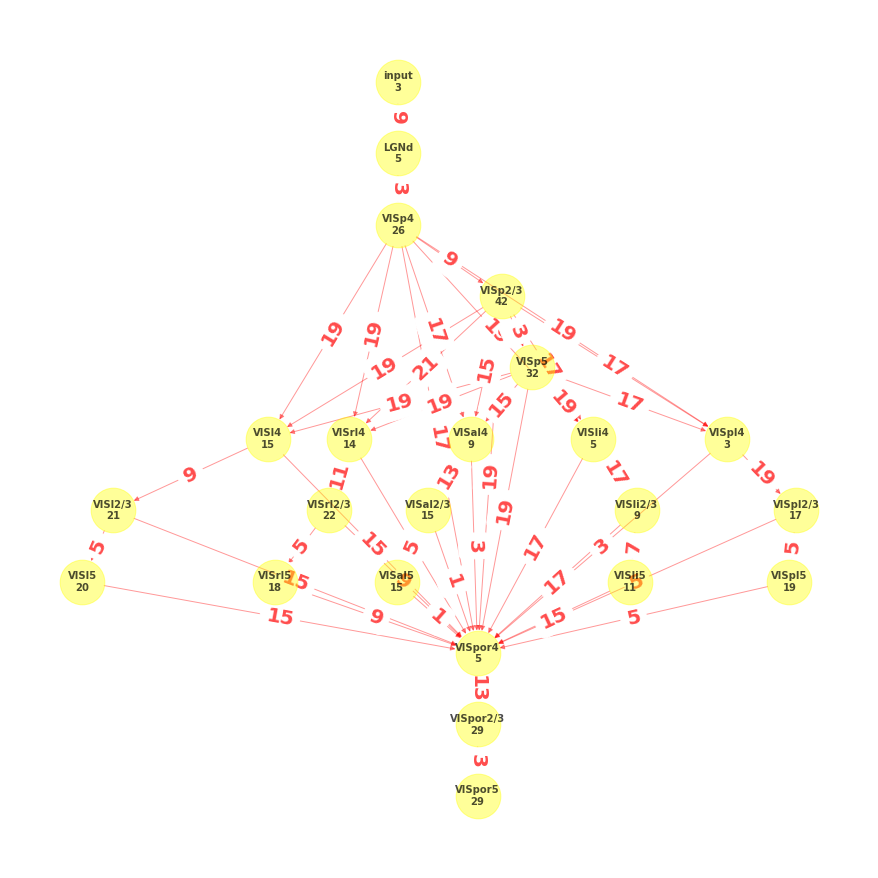

In [6]:
net.draw_graph()

<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #F0FAFF; ">

The `network` class has a `save_network` method that will save the resulting architecture in a `pkl` file.  If you only want to use MouseNet, you can load this network without performing the previous steps (the GitHub repo has an example architecture `pkl` you can use) by using the `load_network_from_pickle` method.
    

    
</div>

In [7]:
network.save_network_to_pickle(net, 'network_complete_updated_number(3,64,64).pkl')

In [136]:
# We have to load the following weights because of a bug fix in progress
# The trained ImageNet weights in the repo require this pkl file at the moment.

net = network.load_network_from_pickle('../cmouse/exps/imagenet/myresults/network_complete_updated_number(3,64,64).pkl')

<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #F0FAFF; ">
<p>The `mousenet_complete_pool` object will instantiate a pytorch model object using this architecture.
</div>

In [17]:
import mousenet_complete_pool

In [18]:
mousenet = mousenet_complete_pool.MouseNetCompletePool(net)

<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #F0FAFF; ">
<p>The `mousenet` object is a `pytorch` model object whose forward method will return the ImageNet class chosen under the model.  This model can be trained with a standard train loop as would be done with any pytorch model.  

    
<p>Scripts that train MouseNet on cifar and ImageNet can be found in the GitHub repo.
</div>

In [31]:
# Example train loop (the basic loop from the training scripts in the GitHub repo)

# import torch.optim as optim

# mousenet.to(device)

# optimizer = optim.SGD(mousenet.parameters(), lr=LR, momentum=MOMENTUM, weight_decay=5e-4)
# for data, target in train_loader:
#       data, target = data.to(device), target.to(device)
#       optimzier.zero_grad()
#       output=mousenet(data)
#       loss = torch.nn.functional.cross_entropy(output, target)
#       loss.backward()
#       optimizer.step()


<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #F0FAFF; ">
For now we will load pretrained weights from ImageNet classification training.  This is done in the standard way under pytorch.  (See the note above about loading the correct architecture file.  The ImageNet pretrained weights in the repo require the corresponding `pkl` file.
</div>

In [24]:
f = torch.load('../cmouse/exps/imagenet/1111_model_best.pth.tar', map_location='cpu')
mousenet.load_state_dict(f['state_dict'])
best_acc1 = f['best_acc1']

In [72]:
# Generate random input
# 10 3-channel images of shape 64,64
x = torch.rand(10,3,64,64)

<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #F0FAFF; ">
Features from individual layers can be computed with the `get_img_feature` method, which takes the input (a torch tensor) and a list of areas as arguments.  Names of areas should correspond to one of the nodes shown in the graph above.
</div>

In [26]:
mousenet.get_img_feature(x, ['VISp4'])

tensor([[0.9578, 0.0000, 2.6605,  ..., 0.8625, 1.1061, 0.4588],
        [0.0000, 0.0260, 0.0000,  ..., 0.7713, 0.0000, 0.8771],
        [0.0000, 0.9739, 0.0000,  ..., 0.5602, 0.0000, 0.8723],
        ...,
        [0.7937, 0.0000, 0.0000,  ..., 0.0302, 0.0000, 1.4334],
        [0.3094, 0.0000, 1.2403,  ..., 0.0000, 0.0000, 1.2229],
        [0.0000, 0.0000, 1.4696,  ..., 0.5155, 0.0000, 0.7060]],
       grad_fn=<ViewBackward>)

<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #F0FAFF; ">
If you request more than one area, the output for each area will be downsampled to 4x4 and then concatenated, so if you require the full output of each area, they should be computed one at a time.
</div>

In [27]:
OUTPUT_AREAS = ['VISp5', 'VISl5', 'VISrl5', 'VISli5', 'VISpl5', 'VISal5', 'VISpor5']

mousenet.get_img_feature(x, OUTPUT_AREAS)

tensor([[0.3281, 0.2948, 0.4538,  ..., 0.5602, 0.5414, 0.8233],
        [1.7981, 0.6842, 0.7010,  ..., 0.7929, 0.6605, 0.7622],
        [1.4615, 0.4048, 0.9075,  ..., 0.7088, 0.6660, 0.7212],
        ...,
        [0.8223, 0.2482, 0.6707,  ..., 0.5976, 0.7483, 0.7641],
        [1.3002, 1.9642, 0.2342,  ..., 0.7053, 0.7734, 0.7310],
        [0.5748, 0.6061, 1.1234,  ..., 0.7592, 0.8460, 0.8200]],
       grad_fn=<CatBackward>)

<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #F0FAFF; ">

<h2>Example:  Computing tuning curves for units in VISp4 in response to static gratings.
<p>
    
</div>

In [35]:
import numpy as np
import matplotlib.pyplot as plt



In [43]:
grating = lambda xc:  np.cos(10*np.pi*xc/64)

def rotate(X, Y, theta):
    Xp = X*np.cos(theta) + Y*np.sin(theta)
    Yp = -X*np.sin(theta) + Y*np.cos(theta)
    return Xp, Yp

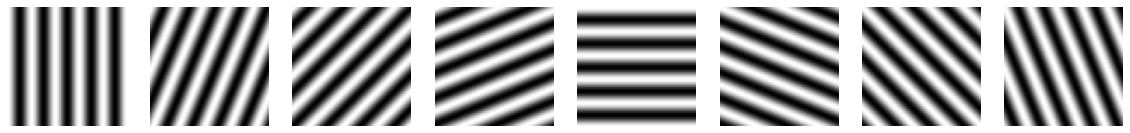

In [75]:
X, Y = np.meshgrid(np.arange(64), np.arange(64))

fig, ax = plt.subplots(1,8, figsize=(20,5))

grating_input = []

for i in range(8):
    grating_input.append(grating(X))
    ax[i].imshow(grating(X), cmap='gray')
    ax[i].axis('off')
    X, Y = rotate(X,Y, np.pi/8)

In [76]:
grating_input = np.stack(grating_input)
grating_input = np.repeat(grating_input[:,np.newaxis,:,:], 3, axis=1)
grating_input = grating_input.astype('float32')   # remember to convert to float32 datatype
grating_input = torch.tensor(grating_input)
grating_input.shape

torch.Size([8, 3, 64, 64])

In [78]:
grating_output = mousenet.get_img_feature(grating_input, ['VISp4'])

In [79]:
grating_output.shape

torch.Size([8, 106496])

In [82]:
grating_output = grating_output.detach().numpy()

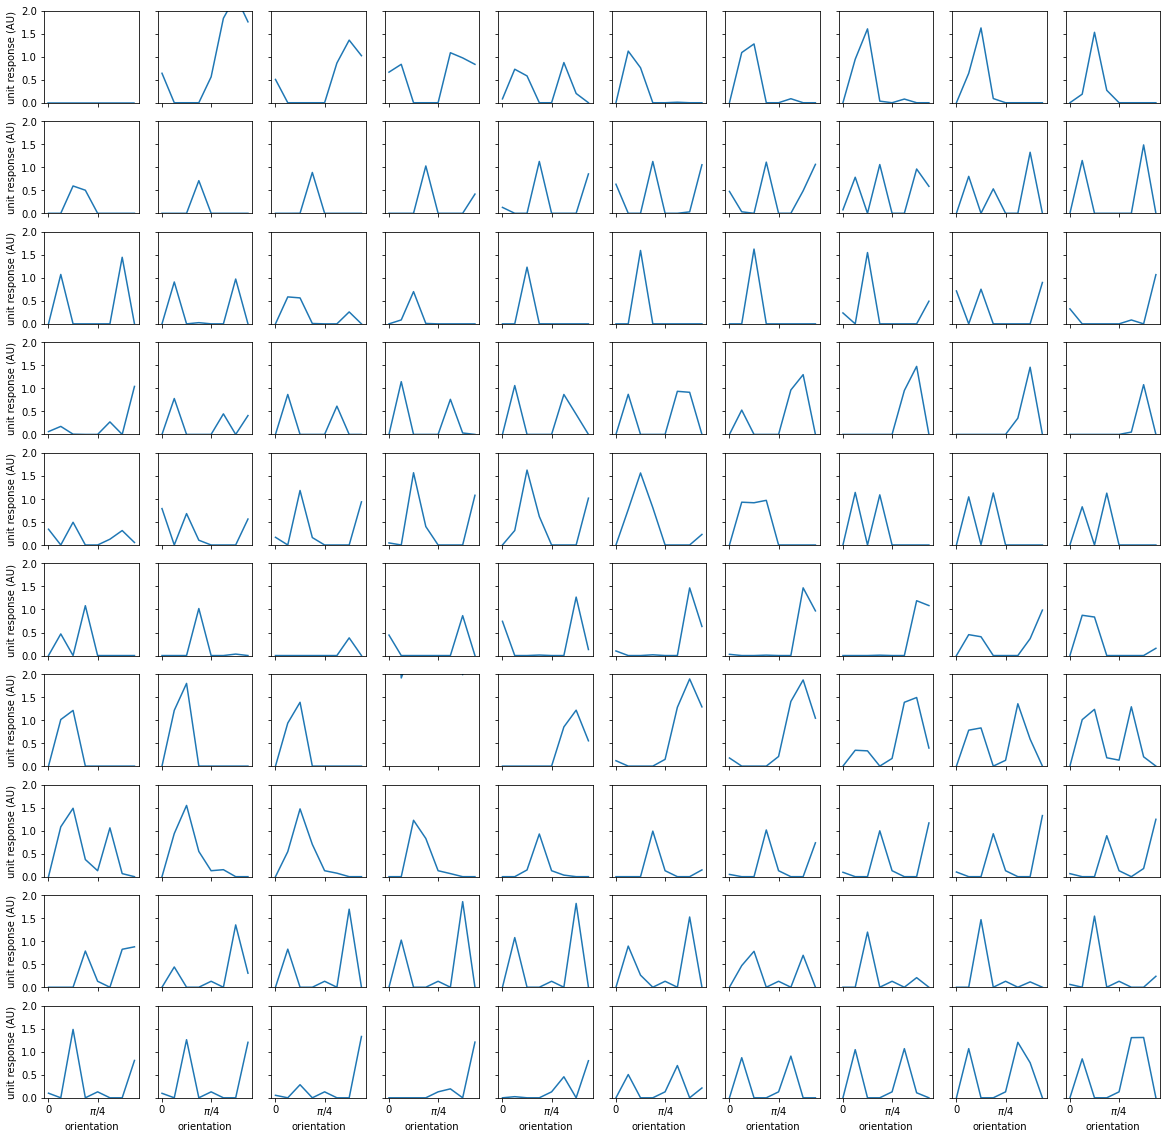

In [135]:
fig, ax = plt.subplots(10,10, figsize=(20,20), sharex=True, sharey=True)


for i in range(10):
    for j in range(10):
        ax[i,j].plot(grating_output.T[i*10+j])
        ax[i,j].set_xticks([0,4])
        ax[i,j].set_xticklabels(['0','$\pi/4$'])
        ax[i,j].set_ylim([0,2])
        if j==0:
            ax[i,j].set_ylabel("unit response (AU)")
        if i==9:
            ax[i,j].set_xlabel("orientation")